In [1]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from sklearn.model_selection import train_test_split
import numpy as np
import os
from matplotlib import pyplot as plt


In [2]:
# Define the dataset paths
data_dir = "C:\\Users\\HP\\Desktop\\Project\\potholes.dl\\potholes data"
pothole_dir = os.path.join(data_dir, "potholes")
normal_pothole_dir = os.path.join(data_dir, "normal")


In [3]:
# Image parameters
img_height, img_width = 150, 150


In [4]:
# Load the images and labels
images = []
labels = []


In [5]:
# Load the images and labels
images = []
labels = []

for img_file in os.listdir(pothole_dir):
    img_path = os.path.join(pothole_dir, img_file)
    img = tf.keras.utils.load_img(img_path, target_size=(img_height, img_width))
    img_array = tf.keras.utils.img_to_array(img)
    images.append(img_array)
    labels.append(1)  # Label 1 for pothole

for img_file in os.listdir(normal_pothole_dir):
    img_path = os.path.join(normal_pothole_dir, img_file)
    img = tf.keras.utils.load_img(img_path, target_size=(img_height, img_width))
    img_array = tf.keras.utils.img_to_array(img)
    images.append(img_array)
    labels.append(0)  # Label 0 for non-pothole

images = np.array(images) / 255.0  # Normalize pixel values
labels = np.array(labels)

In [6]:
# Split data into train, validation, and test sets
X_train, X_temp, y_train, y_temp = train_test_split(images, labels, test_size=0.3, random_state=42)
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42)


In [7]:
# Data Augmentation for training
train_datagen = ImageDataGenerator(
    rotation_range=20,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True
)

In [8]:
# Prepare augmented data
train_generator = train_datagen.flow(X_train, y_train, batch_size=32)


In [9]:
# 2. Model Creation
model = Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=(img_height, img_width, 3)),
    MaxPooling2D((2, 2)),

    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),

    Conv2D(128, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),

    Flatten(),
    Dense(128, activation='relu'),
    Dropout(0.5),
    Dense(1, activation='sigmoid')
])

c:\Users\HP\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [10]:
model.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])


In [11]:
# 3. Model Training
history = model.fit(
    train_generator,
    epochs=15,
    validation_data=(X_val, y_val)
)

c:\Users\HP\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/15
15/15 ━━━━━━━━━━━━━━━━━━━━ 16s 894ms/step - accuracy: 0.5251 - loss: 0.9365 - val_accuracy: 0.4412 - val_loss: 0.7084
Epoch 2/15
15/15 ━━━━━━━━━━━━━━━━━━━━ 13s 877ms/step - accuracy: 0.5624 - loss: 0.6726 - val_accuracy: 0.4608 - val_loss: 0.6280
Epoch 3/15
15/15 ━━━━━━━━━━━━━━━━━━━━ 14s 901ms/step - accuracy: 0.6735 - loss: 0.5670 - val_accuracy: 0.7157 - val_loss: 0.7325
Epoch 4/15
15/15 ━━━━━━━━━━━━━━━━━━━━ 16s 1s/step - accuracy: 0.8049 - loss: 0.4853 - val_accuracy: 0.8922 - val_loss: 0.2538
Epoch 5/15
15/15 ━━━━━━━━━━━━━━━━━━━━ 15s 975ms/step - accuracy: 0.8323 - loss: 0.3915 - val_accuracy: 0.8431 - val_loss: 0.3769
Epoch 6/15
15/15 ━━━━━━━━━━━━━━━━━━━━ 15s 963ms/step - accuracy: 0.8073 - loss: 0.4244 - val_accuracy: 0.9216 - val_loss: 0.2637
Epoch 7/15
15/15 ━━━━━━━━━━━━━━━━━━━━ 20s 928ms/step - accuracy: 0.8066 - loss: 0.4288 - val_accuracy: 0.9020 - val_loss: 0.2919
Epoch 8/15
15/15 ━━━━━━━━━━━━━━━━━━━━ 15s 981ms/step - accuracy: 0.8394 - loss: 0.3823 - val_accurac

In [12]:
# 4. Model Evaluation
loss, accuracy = model.evaluate(X_test, y_test)
print(f"Test Loss: {loss}")
print(f"Test Accuracy: {accuracy}")


4/4 ━━━━━━━━━━━━━━━━━━━━ 1s 161ms/step - accuracy: 0.8340 - loss: 0.3365
Test Loss: 0.33919233083724976
Test Accuracy: 0.8349514603614807


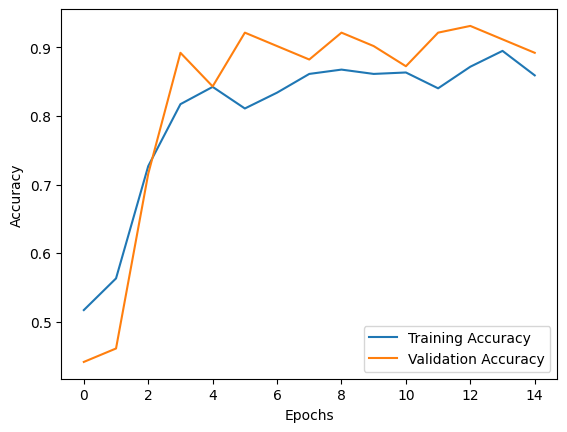

In [18]:
# 5. Plotting Training Results
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()


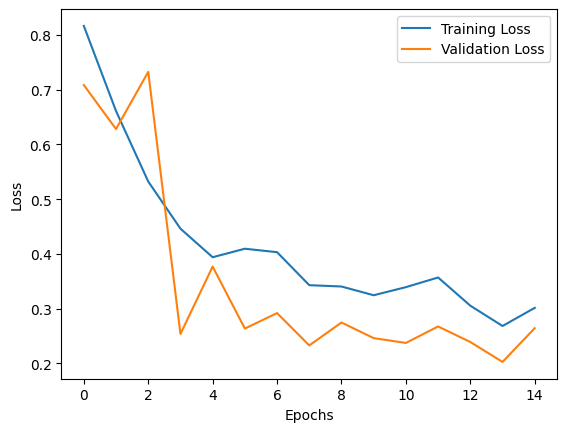

In [19]:
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

In [20]:
model.save("pothole_detection_model.h5")

In [21]:
# 6. Model Prediction
sample_image = X_test[2]  # Example image from test set
prediction = model.predict(np.expand_dims(sample_image, axis=0))
print(f"Prediction: {'Potholes' if prediction > 0.5 else 'normal'}")


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 140ms/step
Prediction: normal


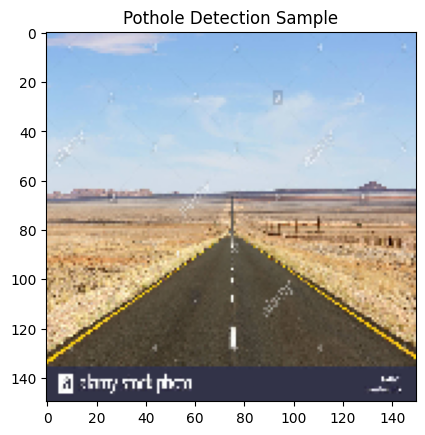

In [17]:
# Show sample image
plt.imshow(sample_image)
plt.title("Pothole Detection Sample")
plt.show()
